In [67]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


In [68]:
#read csv file
df=pd.read_csv(r"dataset\Sleep_health_and_lifestyle_dataset.csv")

In [69]:
# First 5 datapoints
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [70]:
# Display the first few rows of the dataset
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

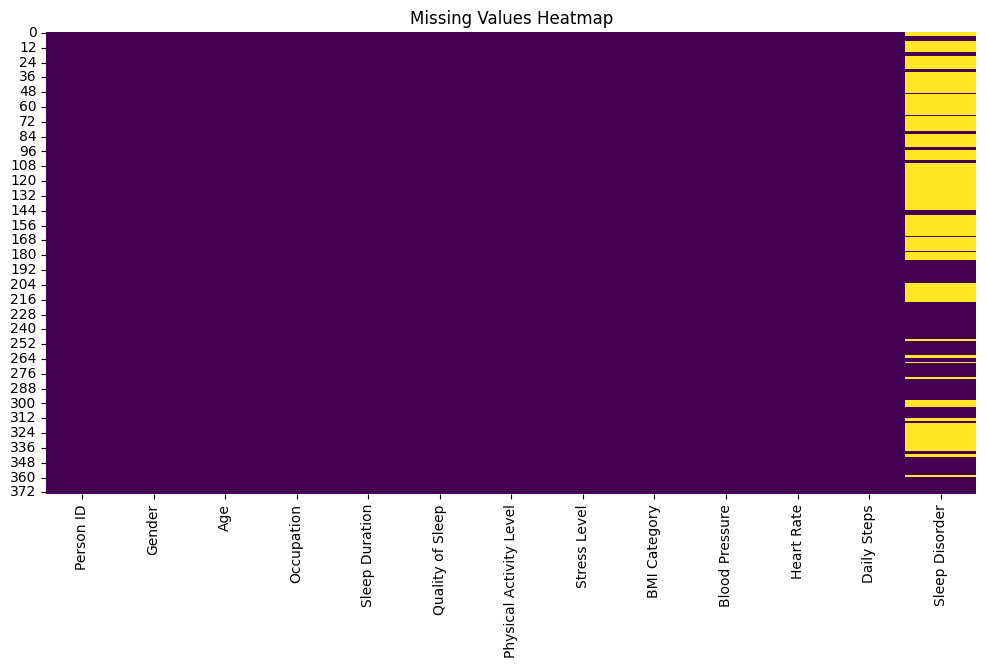

In [71]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [72]:
# Value count of Sleep disorder instances
df["Sleep Disorder"].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [73]:
# Replace values in "Sleep Disorder" column
df["Sleep Disorder"] = df["Sleep Disorder"].replace(
    {np.nan: 'No Sleep Disorder', 'Sleep Apnea': "Sleep Apnear", 'Insomnia': "Insomnia"}
)

In [74]:
df["Sleep Disorder"].value_counts()

Sleep Disorder
No Sleep Disorder    219
Sleep Apnear          78
Insomnia              77
Name: count, dtype: int64

In [75]:
# Data Description
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [76]:
# Drop Person_ID column
df.drop(["Person ID", "Blood Pressure"],axis=1,inplace=True)

In [77]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Sleep Disorder
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnear
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnear
...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnear
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnear
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnear
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnear


In [78]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
No Sleep Disorder    219
Sleep Apnear          78
Insomnia              77
Name: count, dtype: int64

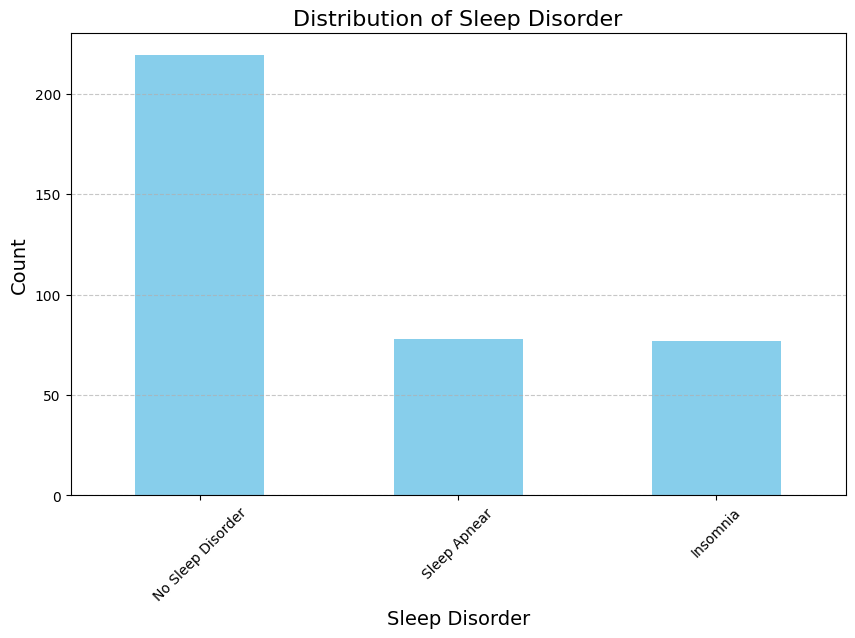

In [79]:
import matplotlib.pyplot as plt

# Count the values
value_counts = df['Sleep Disorder'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sleep Disorder', fontsize=16)
plt.xlabel('Sleep Disorder', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

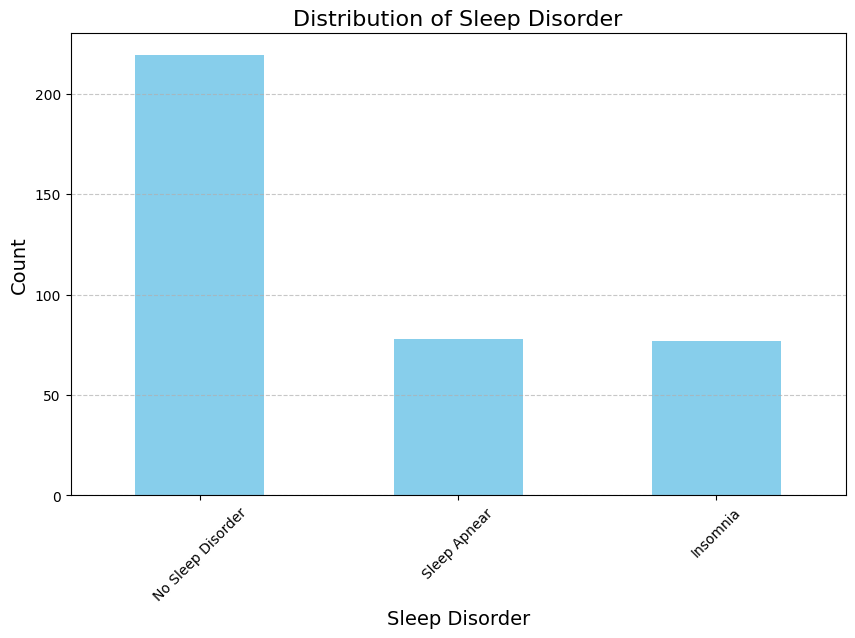

In [80]:
import matplotlib.pyplot as plt

# Count the values
value_counts = df['Sleep Disorder'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sleep Disorder', fontsize=16)
plt.xlabel('Sleep Disorder', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [81]:
#label encoding the object data.

from sklearn.preprocessing import LabelEncoder

# Store original column names
original_columns = df.select_dtypes(include='object').columns

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical variable
for col in original_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Print the mapping between original categories and numerical labels
for col, encoder in label_encoders.items():
    print(f"Mapping for column '{col}':")
    for label, category in enumerate(encoder.classes_):
        print(f"Label {label}: {category}")
    print("==============================================")
    print()

Mapping for column 'Gender':
Label 0: Female
Label 1: Male

Mapping for column 'Occupation':
Label 0: Accountant
Label 1: Doctor
Label 2: Engineer
Label 3: Lawyer
Label 4: Manager
Label 5: Nurse
Label 6: Sales Representative
Label 7: Salesperson
Label 8: Scientist
Label 9: Software Engineer
Label 10: Teacher

Mapping for column 'BMI Category':
Label 0: Normal
Label 1: Normal Weight
Label 2: Obese
Label 3: Overweight

Mapping for column 'Sleep Disorder':
Label 0: Insomnia
Label 1: No Sleep Disorder
Label 2: Sleep Apnear



In [82]:
# Define features and target
X = df.drop(columns='Sleep Disorder')
y = df['Sleep Disorder']

In [83]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [84]:
y_balanced.value_counts()

Sleep Disorder
1    219
2    219
0    219
Name: count, dtype: int64

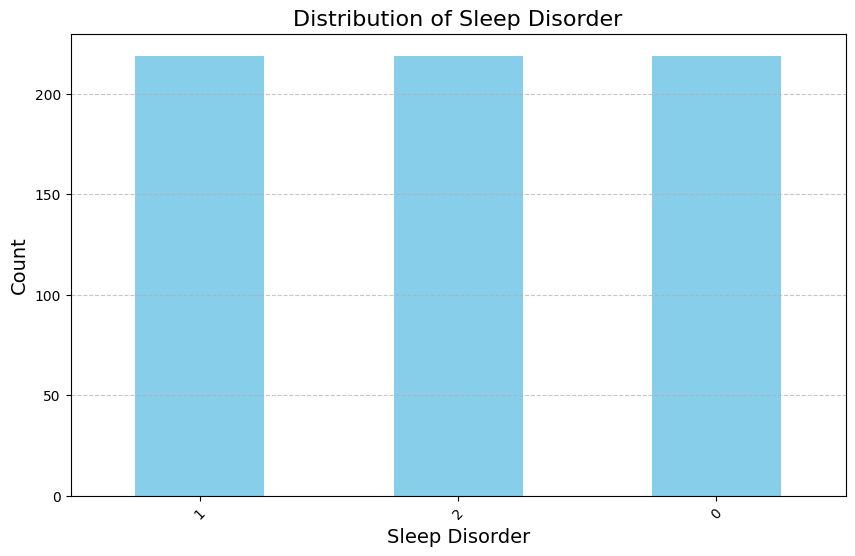

In [85]:
import matplotlib.pyplot as plt

# Count the values
value_counts = y_balanced.value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sleep Disorder', fontsize=16)
plt.xlabel('Sleep Disorder', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [86]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((525, 10), (132, 10), (525,), (132,))

In [87]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
X_train

array([[ 1.19605834, -0.04998509,  0.77993803, ...,  0.8008812 ,
         0.251672  , -0.43202625],
       [ 1.19605834,  0.54105478, -1.18236612, ...,  0.06836791,
         3.2545765 , -1.79308409],
       [-0.83607962,  1.7231345 ,  0.12583665, ...,  0.8008812 ,
        -0.60630072,  0.15973803],
       ...,
       [-0.83607962,  0.54105478,  0.12583665, ...,  0.8008812 ,
         0.89515153,  1.93503087],
       [ 1.19605834, -0.04998509,  0.77993803, ...,  0.8008812 ,
         0.251672  , -0.43202625],
       [-0.83607962, -0.99564887,  1.7610901 , ..., -1.39665868,
        -0.60630072,  0.15973803]])

In [89]:
X_test

array([[ 1.19605834, -0.16819306, -1.18236612, ...,  0.06836791,
         3.04008332, -1.88125696],
       [-0.83607962,  0.54105478,  0.12583665, ...,  0.8008812 ,
         0.89515153,  1.93503087],
       [-0.83607962,  0.65926275,  0.12583665, ...,  0.8008812 ,
         0.89515153,  1.93503087],
       ...,
       [-0.83607962,  1.13209464, -0.85531543, ..., -1.39665868,
        -1.24978026, -1.02379052],
       [-0.83607962,  0.65926275,  0.12583665, ...,  0.8008812 ,
         0.89515153,  1.93503087],
       [-0.83607962, -1.82310467,  0.12583665, ..., -0.66414539,
         1.96761743, -1.6155548 ]])

In [90]:
# Save the scaler
with open('Models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Define the stacking and voting classifiers
estimators = [
    ('knn', KNeighborsClassifier()),
    ('svm', SVC(probability=True)),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('ANN', MLPClassifier())
]


# Define the models
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'ANN': MLPClassifier(),
    'Gradient boosting' : GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'Stacking Classifier' : StackingClassifier(estimators=estimators, final_estimator = MLPClassifier(max_iter=300)),
    'Voting Classifier' : VotingClassifier(estimators=estimators, voting='soft')
}

# Function to train and evaluate models
def train_evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}

    for name, model in models.items():
        # Model train
        model.fit(X_train, y_train)

        # Model test
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Store accuracy result
        results[name] = accuracy

        # print accuracy
        print(f'{name} Accuracy: {accuracy:.4f}')

        # print classification report
        print(classification_report(y_test, y_pred))

        # calculate confusion marix
        cm = confusion_matrix(y_test, y_pred)

        # plot the confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{name} Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Save the model
        with open(f'Models/{name}_model.pkl', 'wb') as f:
            pickle.dump(model, f)
            
    return results

KNN Accuracy: 0.8864
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.92      0.90      0.91        52
           2       0.90      0.92      0.91        51

    accuracy                           0.89       132
   macro avg       0.87      0.87      0.87       132
weighted avg       0.89      0.89      0.89       132



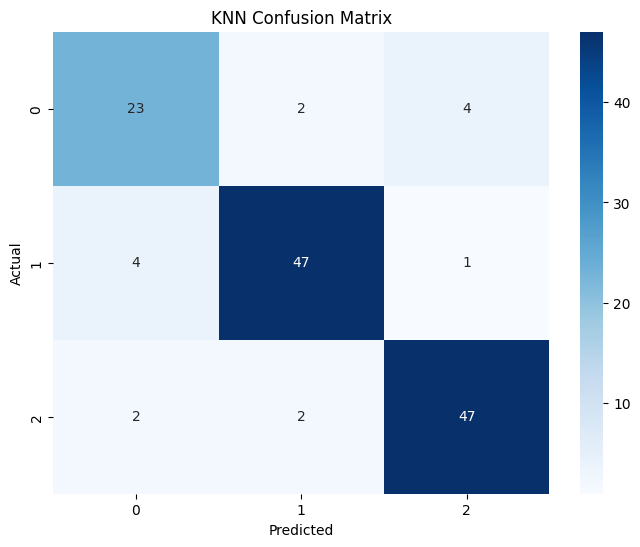

SVM Accuracy: 0.9091
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.92      0.94      0.93        52
           2       0.96      0.88      0.92        51

    accuracy                           0.91       132
   macro avg       0.90      0.91      0.90       132
weighted avg       0.91      0.91      0.91       132



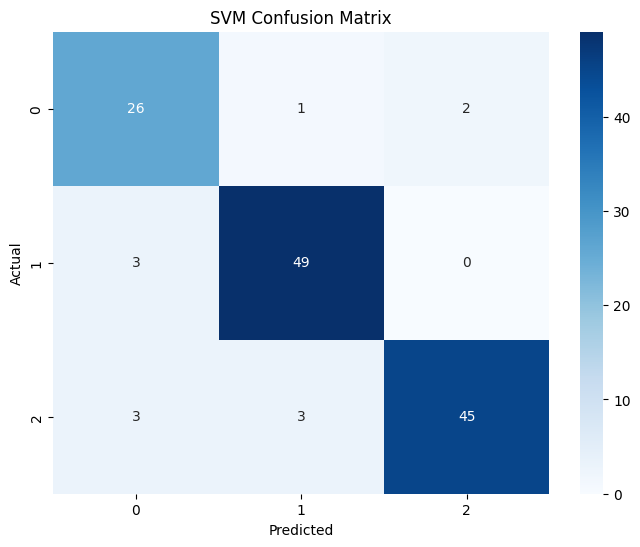

Decision Tree Accuracy: 0.8939
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.94      0.88      0.91        52
           2       0.98      0.90      0.94        51

    accuracy                           0.89       132
   macro avg       0.88      0.89      0.88       132
weighted avg       0.91      0.89      0.90       132



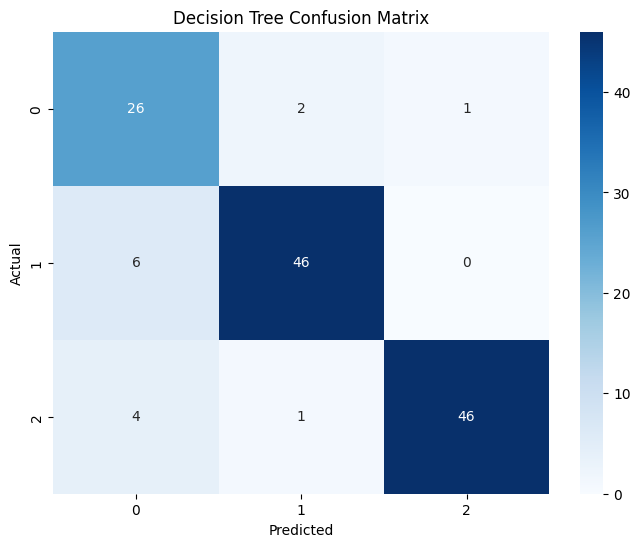

Random Forest Accuracy: 0.9091
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.96      0.90      0.93        52
           2       0.92      0.94      0.93        51

    accuracy                           0.91       132
   macro avg       0.90      0.90      0.90       132
weighted avg       0.91      0.91      0.91       132



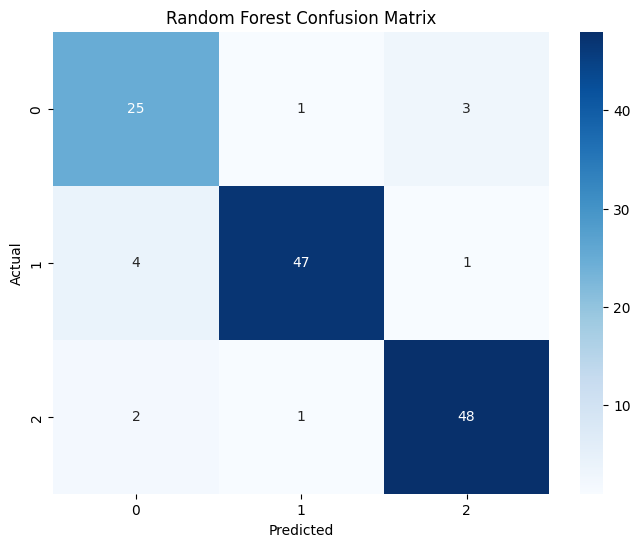

C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ANN Accuracy: 0.9015
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.94      0.92      0.93        52
           2       0.90      0.92      0.91        51

    accuracy                           0.90       132
   macro avg       0.89      0.89      0.89       132
weighted avg       0.90      0.90      0.90       132



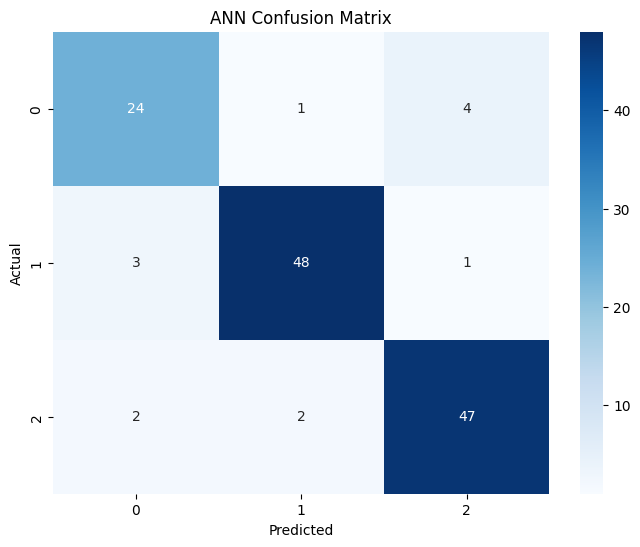

Gradient boosting Accuracy: 0.9242
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.94      0.94      0.94        52
           2       0.92      0.94      0.93        51

    accuracy                           0.92       132
   macro avg       0.92      0.92      0.92       132
weighted avg       0.92      0.92      0.92       132



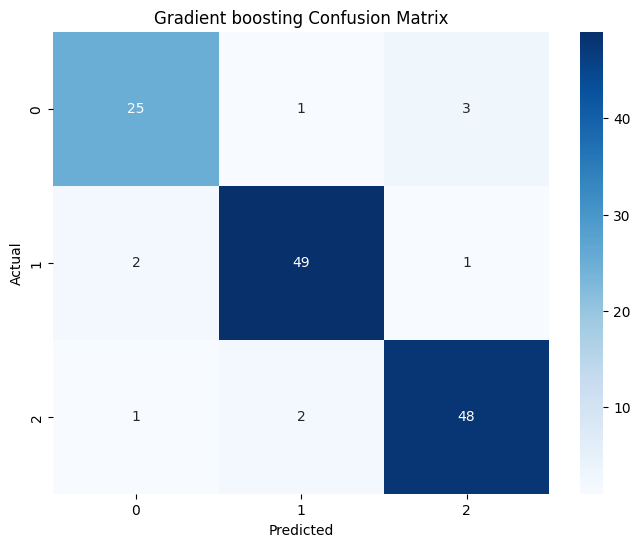

C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Stacking Classifier Accuracy: 0.9318
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.93      0.96      0.94        52
           2       0.96      0.94      0.95        51

    accuracy                           0.93       132
   macro avg       0.93      0.92      0.92       132
weighted avg       0.93      0.93      0.93       132



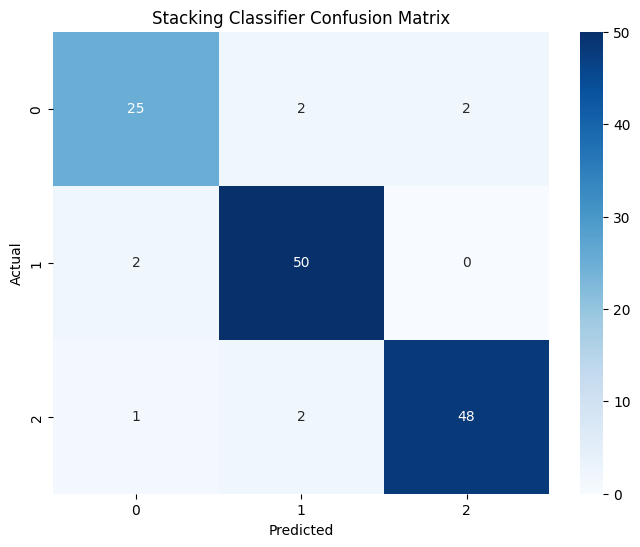

C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Voting Classifier Accuracy: 0.9242
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.94      0.94      0.94        52
           2       0.98      0.90      0.94        51

    accuracy                           0.92       132
   macro avg       0.91      0.93      0.92       132
weighted avg       0.93      0.92      0.93       132



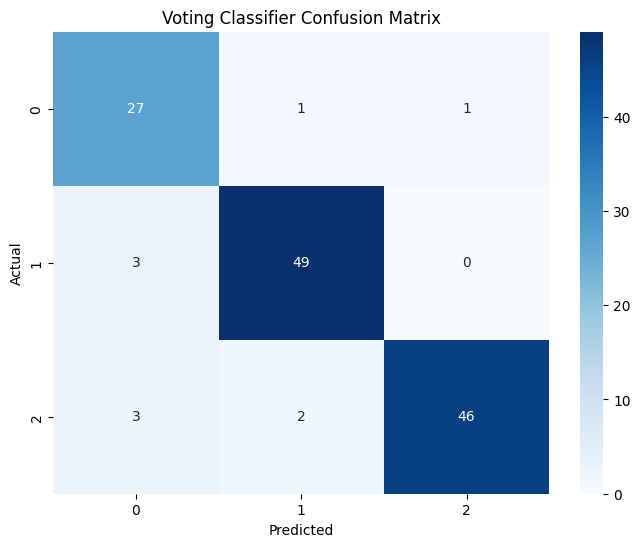

In [92]:
# Train and evaluate models on the original dataset
results = train_evaluate_models(models, X_train, X_test, y_train, y_test)

In [93]:
# Compare model performance
comparison_df = pd.DataFrame({
    'Model': models.keys(),
    'Accuracy': list(results.values())
})
print("\nModel Performance Comparison:")
print(comparison_df)


Model Performance Comparison:
                 Model  Accuracy
0                  KNN  0.886364
1                  SVM  0.909091
2        Decision Tree  0.893939
3        Random Forest  0.909091
4                  ANN  0.901515
5    Gradient boosting  0.924242
6  Stacking Classifier  0.931818
7    Voting Classifier  0.924242


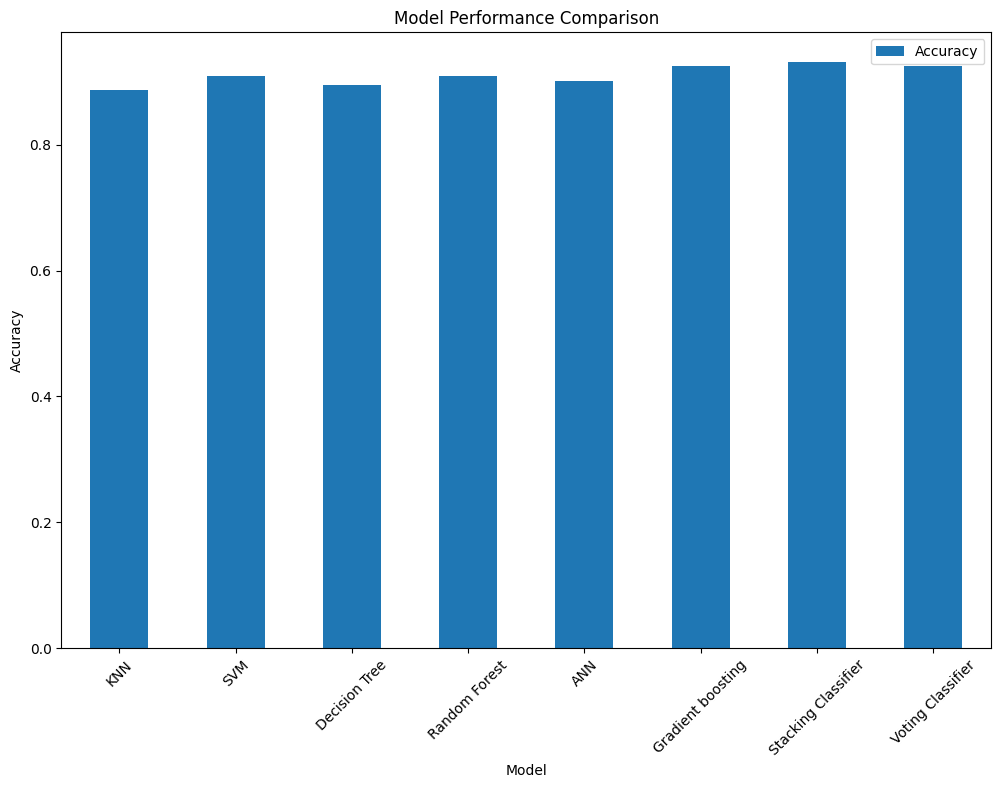

In [94]:
# Plot comparison
comparison_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [95]:
X_test

array([[ 1.19605834, -0.16819306, -1.18236612, ...,  0.06836791,
         3.04008332, -1.88125696],
       [-0.83607962,  0.54105478,  0.12583665, ...,  0.8008812 ,
         0.89515153,  1.93503087],
       [-0.83607962,  0.65926275,  0.12583665, ...,  0.8008812 ,
         0.89515153,  1.93503087],
       ...,
       [-0.83607962,  1.13209464, -0.85531543, ..., -1.39665868,
        -1.24978026, -1.02379052],
       [-0.83607962,  0.65926275,  0.12583665, ...,  0.8008812 ,
         0.89515153,  1.93503087],
       [-0.83607962, -1.82310467,  0.12583665, ..., -0.66414539,
         1.96761743, -1.6155548 ]])

In [96]:
y_test

627    2
271    2
290    2
63     1
302    1
      ..
70     1
403    0
336    1
541    2
18     0
Name: Sleep Disorder, Length: 132, dtype: int32

In [97]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the scaler
with open(r'Models\scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Load the stacking classifier model
model_path = r'Models\Gradient boosting_model.pkl'
with open(model_path, 'rb') as f:
    stacking_classifier = pickle.load(f)

class_labels = {0: 'Insomnia', 1: 'Healthy', 2: 'Sleep Apnea'}

def prediction_func(input):

    # Standardize the features
    input_scaled = scaler.transform([input])

    # Predict using the stacking classifier model
    prediction = stacking_classifier.predict(input_scaled)

    # Map prediction to class labels
    predicted_class = class_labels[prediction[0]]

    # Display the prediction
    print(f"Prediction: {predicted_class}")

Healthy Examples

In [98]:
prediction_func([1, 27, 9, 6.1, 6, 42, 6, 3, 11, 4200])

Prediction: Healthy


C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [99]:
prediction_func([1, 28, 1, 6.2, 6, 60, 8, 0, 9, 10000])

Prediction: Healthy


C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Sleep Apnea examples

In [100]:
prediction_func([1, 28, 6, 5.9, 4, 30, 8, 2, 22, 3000])

Prediction: Sleep Apnea


C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [101]:
prediction_func([1, 28, 6, 5.9, 4, 30, 8, 2, 22, 3000])

Prediction: Sleep Apnea


C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Insomnia Examples

In [102]:
prediction_func([1, 28, 9, 5.9, 4, 30, 8, 2, 22, 3000])

C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction: Insomnia


In [103]:
prediction_func([1, 29, 10, 6.3, 6, 40, 7, 2, 22, 3500])

Prediction: Insomnia


C:\Users\0877\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [104]:
X_balanced[:10]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps
0,1,27,9,6.1,6,42,6,3,77,4200
1,1,28,1,6.2,6,60,8,0,75,10000
2,1,28,1,6.2,6,60,8,0,75,10000
3,1,28,6,5.9,4,30,8,2,85,3000
4,1,28,6,5.9,4,30,8,2,85,3000
5,1,28,9,5.9,4,30,8,2,85,3000
6,1,29,10,6.3,6,40,7,2,82,3500
7,1,29,1,7.8,7,75,6,0,70,8000
8,1,29,1,7.8,7,75,6,0,70,8000
9,1,29,1,7.8,7,75,6,0,70,8000


In [105]:
y_balanced[:10]

0    1
1    1
2    1
3    2
4    2
5    0
6    0
7    1
8    1
9    1
Name: Sleep Disorder, dtype: int32

### Mapping for column 'Gender':
| Label | Description |
|-------|-------------|
| 0     | Female      |
| 1     | Male        |

---

### Mapping for column 'Occupation':
| Label | Description           |
|-------|-----------------------|
| 0     | Accountant            |
| 1     | Doctor                |
| 2     | Engineer              |
| 3     | Lawyer                |
| 4     | Manager               |
| 5     | Nurse                 |
| 6     | Sales Representative  |
| 7     | Salesperson           |
| 8     | Scientist             |
| 9     | Software Engineer     |
| 10    | Teacher               |

---

### Mapping for column 'BMI Category':
| Label | Description      |
|-------|------------------|
| 0     | Normal           |
| 1     | Normal Weight    |
| 2     | Obese            |
| 3     | Overweight       |

---

### Mapping for column 'Sleep Disorder':
| Label | Description        |
|-------|--------------------|
| 0     | Insomnia           |
| 1     | No Sleep Disorder  |
| 2     | Sleep Apnear       |
